In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [2]:
train = pd.read_csv('data/train.csv', index_col = 'day_text')
test = pd.read_csv('data/test.csv', index_col = 'day_text')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    7000 non-null   object 
 1   H_text       7000 non-null   int64  
 2   HR_text      7000 non-null   int64  
 3   S_text       7000 non-null   int64  
 4   ST_text      7000 non-null   int64  
 5   DU_text      7000 non-null   int64  
 6   ER_text      7000 non-null   int64  
 7   result_text  7000 non-null   int64  
 8   location     7000 non-null   object 
 9   temp         7000 non-null   float64
 10  rain         7000 non-null   float64
 11  humidity     7000 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 710.9+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_text    3398 non-null   object 
 1   H_text       3398 non-null   int64  
 2   HR_text      3398 non-null   int64  
 3   S_text       3398 non-null   int64  
 4   ST_text      3398 non-null   int64  
 5   DU_text      3398 non-null   int64  
 6   ER_text      3398 non-null   int64  
 7   result_text  3398 non-null   int64  
 8   location     3398 non-null   object 
 9   temp         3398 non-null   float64
 10  rain         3398 non-null   float64
 11  humidity     3398 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 345.1+ KB


In [5]:
train.corr()

,H_text,HR_text,S_text,ST_text,DU_text,ER_text,result_text,temp,rain,humidity
H_text,1.000000,0.381357,0.109626,-0.107799,0.080418,-0.002447,0.411615,0.067297,0.002754,0.006877
HR_text,0.381357,1.000000,-0.020410,0.009257,-0.045893,-0.019503,0.267704,0.050888,-0.024830,0.052948
S_text,0.109626,-0.020410,1.000000,0.024302,-0.070301,-0.023027,0.168250,-0.003281,-0.000741,-0.037783
ST_text,-0.107799,0.009257,0.024302,1.000000,-0.174138,0.042208,-0.177470,-0.068097,0.001156,0.051873
DU_text,0.080418,-0.045893,-0.070301,-0.174138,1.000000,0.014275,-0.079218,-0.003311,-0.005420,0.006083
ER_text,-0.002447,-0.019503,-0.023027,0.042208,0.014275,1.000000,-0.172610,-0.034883,-0.012892,-0.031010
result_text,0.411615,0.267704,0.168250,-0.177470,-0.079218,-0.172610,1.000000,0.000000,0.000000,0.000000
temp,0.067297,0.050888,-0.003281,-0.068097,-0.003311,-0.034883,0.000000,1.000000,-0.006105,-0.180981
rain,0.002754,-0.024830,-0.000741,0.001156,-0.005420,-0.012892,0.000000,-0.006105,1.000000,0.012211
humidity,0.006877,0.052948,-0.037783,0.051873,0.006083,-0.031010,0.000000,-0.180981,0.012211,1.000000


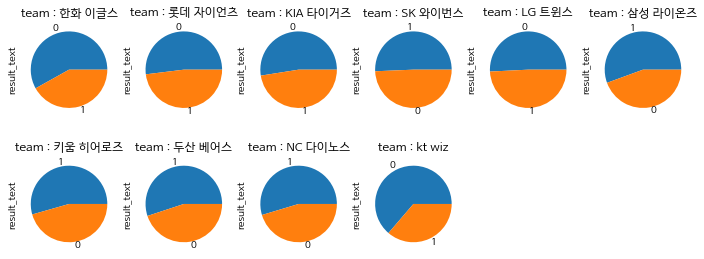

In [6]:
import matplotlib
matplotlib.rc('font', family='Hancom Gothic')  
fig = plt.figure(figsize=(12,7))

i=1
for title in train['team_text'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('team : {}'.format(title))
    train.result_text[train['team_text'] == title].value_counts().plot(kind='pie')
    i += 1

<AxesSubplot:xlabel='ER_text', ylabel='count'>

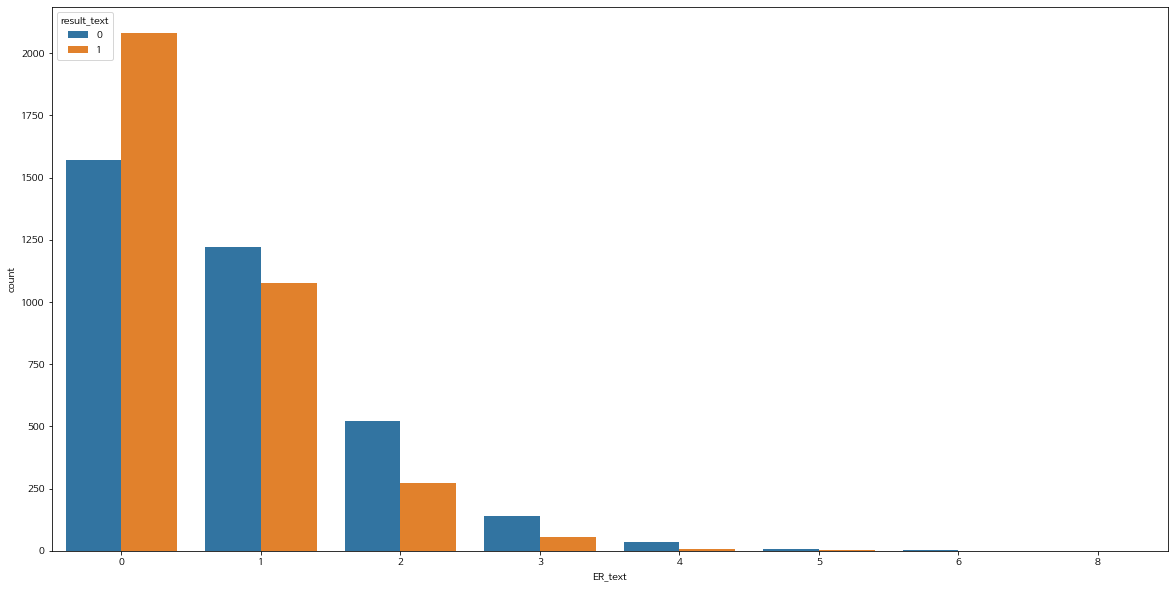

In [7]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data = train, x = 'ER_text', hue='result_text')

<AxesSubplot:xlabel='ST_text', ylabel='count'>

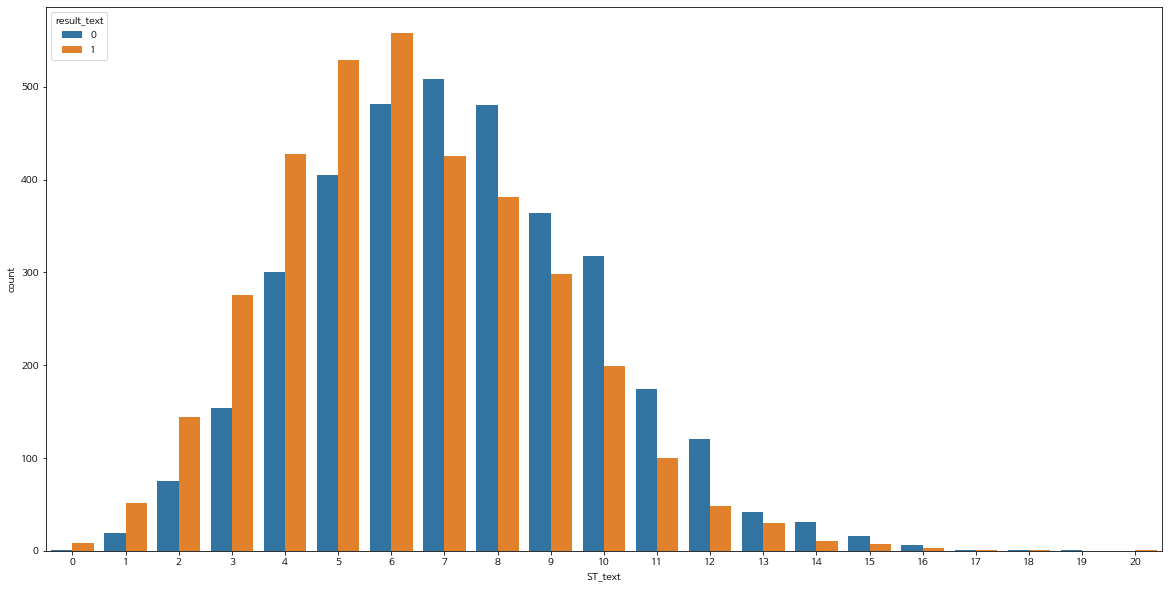

In [8]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data = train, x = 'ST_text', hue='result_text')

### 정규화

In [9]:
train_test_data = [train, test]

In [10]:
from sklearn.preprocessing import StandardScaler
for dataset in train_test_data:
    dataset['H_text'] = StandardScaler().fit_transform(dataset['H_text'].values.reshape(-1, 1))
    dataset['HR_text'] = StandardScaler().fit_transform(dataset['HR_text'].values.reshape(-1, 1))
    dataset['S_text'] = StandardScaler().fit_transform(dataset['S_text'].values.reshape(-1, 1))
    dataset['ST_text'] = StandardScaler().fit_transform(dataset['ST_text'].values.reshape(-1, 1))
    dataset['DU_text'] = StandardScaler().fit_transform(dataset['DU_text'].values.reshape(-1, 1))
    dataset['ER_text'] = StandardScaler().fit_transform(dataset['ER_text'].values.reshape(-1, 1))
    dataset['temp'] = StandardScaler().fit_transform(dataset['temp'].values.reshape(-1, 1))
    dataset['rain'] = StandardScaler().fit_transform(dataset['rain'].values.reshape(-1, 1))
    dataset['humidity'] = StandardScaler().fit_transform(dataset['humidity'].values.reshape(-1, 1))

In [11]:
y_train = train['result_text']
X_train = train.drop('result_text', axis = 1)
y_test = test['result_text']
X_test = test.drop('result_text', axis = 1)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team_text  7000 non-null   object 
 1   H_text     7000 non-null   float64
 2   HR_text    7000 non-null   float64
 3   S_text     7000 non-null   float64
 4   ST_text    7000 non-null   float64
 5   DU_text    7000 non-null   float64
 6   ER_text    7000 non-null   float64
 7   location   7000 non-null   object 
 8   temp       7000 non-null   float64
 9   rain       7000 non-null   float64
 10  humidity   7000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 816.2+ KB


In [13]:
y_train.shape

(7000,)

In [14]:
y_test.shape

(3398,)

In [15]:
cat_feature = ["team_text","location"]

In [16]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix=i)
    X_train = pd.concat([X_train, dummy], axis=1)
    X_train.drop(i, axis=1, inplace = True)

In [17]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix=i)
    X_test = pd.concat([X_test, dummy], axis=1)
    X_test.drop(i, axis=1, inplace = True)

In [18]:
set(X_train.columns) - set(X_test.columns)

set()

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 4.7 to 7.7
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              7000 non-null   float64
 1   HR_text             7000 non-null   float64
 2   S_text              7000 non-null   float64
 3   ST_text             7000 non-null   float64
 4   DU_text             7000 non-null   float64
 5   ER_text             7000 non-null   float64
 6   temp                7000 non-null   float64
 7   rain                7000 non-null   float64
 8   humidity            7000 non-null   float64
 9   team_text_KIA 타이거즈  7000 non-null   uint8  
 10  team_text_LG 트윈스    7000 non-null   uint8  
 11  team_text_NC 다이노스   7000 non-null   uint8  
 12  team_text_SK 와이번스   7000 non-null   uint8  
 13  team_text_kt wiz    7000 non-null   uint8  
 14  team_text_두산 베어스    7000 non-null   uint8  
 15  team_text_롯데 자이언츠   7000 non-null   uint8  
 16  team_text_

In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 7.7 to 10.26토
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              3398 non-null   float64
 1   HR_text             3398 non-null   float64
 2   S_text              3398 non-null   float64
 3   ST_text             3398 non-null   float64
 4   DU_text             3398 non-null   float64
 5   ER_text             3398 non-null   float64
 6   temp                3398 non-null   float64
 7   rain                3398 non-null   float64
 8   humidity            3398 non-null   float64
 9   team_text_KIA 타이거즈  3398 non-null   uint8  
 10  team_text_LG 트윈스    3398 non-null   uint8  
 11  team_text_NC 다이노스   3398 non-null   uint8  
 12  team_text_SK 와이번스   3398 non-null   uint8  
 13  team_text_kt wiz    3398 non-null   uint8  
 14  team_text_두산 베어스    3398 non-null   uint8  
 15  team_text_롯데 자이언츠   3398 non-null   uint8  
 16  team_te

### K Fold

In [21]:
# Importing Classifier Modules# Import 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
# clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.72


In [22]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 940


## XGBOOST

In [23]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [24]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.05, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[18:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\smhrd\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [25]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 967


In [26]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.72
